# Employee Analysis

### Setup and load modules

In [15]:
import psycopg2
import pandas as pd
from matplotlib import pyplot as plt

from sqlalchemy import create_engine , inspect
from sqlalchemy.ext.automap import automap_base
from sqlalchemy import select, column, func
from sqlalchemy.orm import Session

# Postgres username, password, and database name 
from userdata import USER, POSTGRES_PORT

# A long string that contains the necessary Postgres login information 
postgres_str = (f'postgresql://{USER}:{POSTGRES_PORT}/Employees') 
# Create the connection 
engine = create_engine(postgres_str)

### Connect to Database

In [3]:
inspector = inspect(engine)

In [4]:
Base = automap_base()
Base.prepare(engine, reflect = True)

In [7]:
inspector.get_table_names()

['employees',
 'departments',
 'dept_emp',
 'depart_manager',
 'titles',
 'salaries']

### Query Database and get the Employee and Salary information

In [30]:
sqlStr = "Select e.*, s.salary from employees as e left join salaries as s on e.emp_id = s.emp_id"
employee = pd.read_sql(sqlStr,postgres_str)
employee.salary = employee.salary.astype('int')


employee

,emp_id,emp_title_id,birth_date,first_name,last_name,sex,hire_date,salary
0,10005,s0001,1955-01-21,Kyoichi,Maliniak,M,1989-09-12,78228
1,10010,e0002,1963-06-01,Duangkaew,Piveteau,F,1989-08-24,72488
2,10011,s0001,1953-11-07,Mary,Sluis,F,1990-01-22,42365
3,10013,s0002,1963-06-07,Eberhardt,Terkki,M,1985-10-20,40000
4,10017,s0001,1958-07-06,Cristinel,Bouloucos,F,1993-08-03,71380
...,...,...,...,...,...,...,...,...
300019,499948,e0002,1953-05-24,Cordelia,Paludetto,M,1993-01-28,40000
300020,499972,e0003,1957-07-25,Katsuo,Leuchs,F,1989-11-23,41002
300021,499985,s0001,1964-12-26,Gila,Lukaszewicz,M,1997-02-11,40000
300022,499987,s0001,1961-09-05,Rimli,Dusink,F,1998-09-20,52282


### Plot Histogram of Salaries

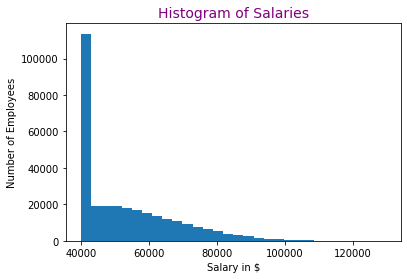

In [18]:
plt.hist(employee['salary'],30)
plt.title("Histogram of Salaries", size=14, color="Purple")
plt.xlabel("Salary in $")
plt.ylabel("Number of Employees")
plt.show()

### Query the database for title and Salary information

In [32]:
sqlStr = "Select e.emp_id, t.title, s.salary "
sqlStr += "from employees as e "
sqlStr += "left join titles as t on e.emp_title_id = t.title_id "
sqlStr += "left join salaries as s on e.emp_id = s.emp_id"
titles = pd.read_sql(sqlStr,postgres_str)
titles.salary = titles.salary.astype('int')

In [21]:
df = titles.groupby("title").agg({'salary':'mean'})

In [33]:
df

,salary
title,
Assistant Engineer,48564.434447
Engineer,48535.336511
Manager,51531.041667
Senior Engineer,48506.799871
Senior Staff,58550.172704
Staff,58465.382850
Technique Leader,48582.896092


### Plot the mean salary by Title

<AxesSubplot:title={'center':'Mean Salary by Title'}, xlabel='title', ylabel='Salary in $'>

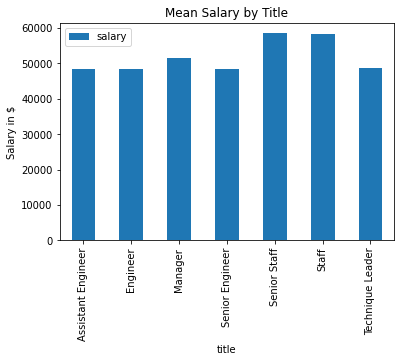

In [25]:
df.plot.bar(title = "Mean Salary by Title", ylabel ="Salary in $")

### Who am I

In [31]:
employee[employee.emp_id == 499942]

,emp_id,emp_title_id,birth_date,first_name,last_name,sex,hire_date,salary
37455,499942,e0004,1963-01-10,April,Foolsday,F,1997-02-10,40000


I guess I am an __April Fool's Day__ prank!